#**Predict Loan status detection**

## Load Data

In [6]:
import pandas as pd
import numpy as np

In [7]:
file_path = "/content/train_u6lujuX_CVtuZ9i (1).csv"

In [8]:
training_data = pd.read_csv(file_path)

In [9]:
training_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Preprocess Data

In [10]:
def normalize_data(df, columns):
    for _column in columns:
        df[_column + "_normalized"] = np.sqrt(df[_column])
    return df

training_data = normalize_data(training_data, ["LoanAmount", "ApplicantIncome", "CoapplicantIncome"])

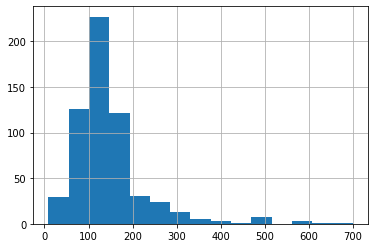

In [11]:
training_data["LoanAmount"].hist(bins=15)

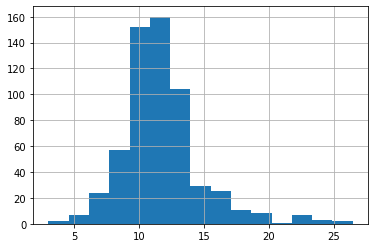

In [12]:
training_data["LoanAmount_normalized"].hist(bins=15)

In [13]:
training_data.isnull().sum()

Loan_ID                          0
Gender                          13
Married                          3
Dependents                      15
Education                        0
Self_Employed                   32
ApplicantIncome                  0
CoapplicantIncome                0
LoanAmount                      22
Loan_Amount_Term                14
Credit_History                  50
Property_Area                    0
Loan_Status                      0
LoanAmount_normalized           22
ApplicantIncome_normalized       0
CoapplicantIncome_normalized     0
dtype: int64

In [14]:
def handle_null(df, columns1, columns2):
    for _column in columns1:
        df[_column].fillna(df[_column].mode()[0], inplace=True)
    for _column in columns2:
        df[_column].fillna(df[_column].mean(), inplace=True)
    return df

training_data = handle_null(training_data, ["Gender", "Married", "Dependents", "Self_Employed", 
                                            "Loan_Amount_Term", "Credit_History"], 
                            ["LoanAmount_normalized"])

In [15]:
training_data.isnull().sum()

Loan_ID                          0
Gender                           0
Married                          0
Dependents                       0
Education                        0
Self_Employed                    0
ApplicantIncome                  0
CoapplicantIncome                0
LoanAmount                      22
Loan_Amount_Term                 0
Credit_History                   0
Property_Area                    0
Loan_Status                      0
LoanAmount_normalized            0
ApplicantIncome_normalized       0
CoapplicantIncome_normalized     0
dtype: int64

In [16]:
training_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_normalized,ApplicantIncome_normalized,CoapplicantIncome_normalized
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,11.709994,76.478755,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,11.313708,67.697858,38.832976
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.124038,54.772256,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,10.954451,50.823223,48.559242
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,11.874342,77.459667,0.000000


## Prepare Data

In [17]:
relevant_fields = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Loan_Amount_Term", "Credit_History",
                  "Property_Area", "Loan_Status", "LoanAmount_normalized", "ApplicantIncome_normalized",
                  "CoapplicantIncome_normalized"]

In [18]:
# continue with only relevant fields
final_training_data = training_data[[*relevant_fields]]

In [19]:
final_training_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_normalized,ApplicantIncome_normalized,CoapplicantIncome_normalized
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,11.709994,76.478755,0.000000
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,11.313708,67.697858,38.832976
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,8.124038,54.772256,0.000000
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,10.954451,50.823223,48.559242
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,11.874342,77.459667,0.000000


In [20]:
# Encode the labeled the data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

final_training_data = final_training_data.apply(label_encoder.fit_transform)

In [21]:
final_training_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_normalized,ApplicantIncome_normalized,CoapplicantIncome_normalized
0,1,0,0,0,0,8,1,2,1,91,376,0
1,1,1,1,0,0,8,1,0,0,81,306,60
2,1,1,0,0,1,8,1,2,1,26,139,0
3,1,1,0,1,0,8,1,2,1,73,90,160
4,1,0,0,0,0,8,1,2,1,95,381,0


In [22]:
# divide data into train and test dataset
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(final_training_data, test_size=0.2, random_state=0) 

In [23]:
train_dataset.shape, test_dataset.shape

((491, 12), (123, 12))

In [24]:
train_input = train_dataset.drop(columns=["Loan_Status"]).values
train_output = train_dataset["Loan_Status"].values

test_input = test_dataset.drop(columns=["Loan_Status"]).values
test_output = test_dataset["Loan_Status"].values

In [25]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_input = scaler.fit_transform(train_input)
test_input = scaler.fit_transform(test_input)

## Training

In [26]:
# Training naive bayes classifier model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_input, train_output)

GaussianNB()

In [27]:
# Calculate accuracy
from sklearn import metrics
test_predictions = model.predict(test_input)
accuracy = metrics.accuracy_score(test_predictions, test_output)
accuracy    # ~83% accuracy

0.8292682926829268

## Inference

In [31]:
inference_datapath = "/content/test_data.csv"  # path of the dataset which you want to predict or generate a test case data to test it
inference_data = pd.read_csv(inference_datapath)

In [32]:
inference_data = normalize_data(inference_data, ["LoanAmount", "ApplicantIncome", "CoapplicantIncome"])
inference_data = handle_null(inference_data, ["Gender", "Married", "Dependents", "Self_Employed", 
                                            "Loan_Amount_Term", "Credit_History"], 
                            ["LoanAmount_normalized"])

In [33]:
relevant_fields = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Loan_Amount_Term", "Credit_History",
                  "Property_Area", "LoanAmount_normalized", "ApplicantIncome_normalized", "CoapplicantIncome_normalized"]
inference_data = inference_data[[*relevant_fields]]
inference_data = inference_data.apply(label_encoder.fit_transform)

In [34]:
inference_input = scaler.fit_transform(inference_data.values)
inference_predictions = model.predict(inference_input)

#**Created By - RAHUL BHUVA**